In [1]:
pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install xgboost



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# !wget http://visual.ic.uff.br/proeng/thiagoelias/database.rar
!pip install opencv-python
!pip install scikit-image
!pip install matplotlib

import os,glob
import numpy as np
import cv2
import glob
import pickle
import tensorflow as tf
import argparse
import re
import datetime
from skimage.transform import rescale, resize, downscale_local_mean
from tensorflow.keras.layers import  Input,Conv2D,BatchNormalization,Activation,Subtract,LeakyReLU,Add,Average,Lambda,MaxPool2D,Dropout,UpSampling2D,Concatenate,Multiply,GlobalAveragePooling2D,Dense,ZeroPadding2D,AveragePooling2D
from tensorflow.keras.layers import concatenate,Flatten,ConvLSTM2D,MaxPooling2D,ReLU,Conv2DTranspose
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
from sklearn.svm import LinearSVC
!pip install GaussianFilter
import matplotlib.pyplot as plt
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from GaussianFilter import feature as Feature
from skimage.feature import hog,local_binary_pattern
from skimage import data, exposure
from skimage.transform import radon, rescale
from skimage.filters import roberts, sobel, scharr, prewitt
from skimage import feature

# !pip install rarfile


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
string = [138,179,180,181,192,198,202,204,209,210,213,240,241,245,249,250,251,255,257,259,261,263,264,270,400,450,500,550,600,650,700]
affected_files_train = []
for f in string:
    list1 = []
    normal_dir = "C:/Users/PN/Desktop/Naiyani_BreastCanserProj/dataset_code01/dataset_code/dataset/train/sick/{}/Segmentadas".format(f)
    normal_dir_text = "C:/Users/PN/Desktop/Naiyani_BreastCanserProj/dataset_code01/dataset_code/dataset/train/sick/{}/Matrizes".format(f)
    dir1 = os.path.join(normal_dir,"*.png")
    normal_files = glob.glob(dir1)
    dir2 = os.path.join(normal_dir_text,"*.txt")
    normal_files_text = glob.glob(dir2)

    try:
        for i in range(len(normal_files)):
            list1.append(normal_files[i]+"|"+normal_files_text[i])
    except:
        pass
            
    affected_files_train.extend(list1)
    
string2 = [1000,137,166,220,226,42,49,51,55,66,68,750,800,850,900,950]

healthy_files_train = []
for f in string2:
    list2 = []
    normal_dir = "C:/Users/PN/Desktop/Naiyani_BreastCanserProj/dataset_code01/dataset_code/dataset/train/healthy/{}/Segmentadas".format(f)
    normal_dir_text = "C:/Users/PN/Desktop/Naiyani_BreastCanserProj/dataset_code01/dataset_code/dataset/train/healthy/{}/Matrizes".format(f)
    dir1 = os.path.join(normal_dir,"*.png")
    normal_files = glob.glob(dir1)
    dir2 = os.path.join(normal_dir_text,"*.txt")
    normal_files_text = glob.glob(dir2)
 
    try:
        for i in range(len(normal_files)):
            list2.append(normal_files[i]+"|"+normal_files_text[i])
    except: 
        pass
    healthy_files_train.extend(list2)
print("-------------------------------")    
print(len(affected_files_train))
print("-------------------------------")  
print(len(healthy_files_train))

-------------------------------
561
-------------------------------
302


In [6]:
string = [256,282,283,286,1050,198,192,209]
affected_files_text2 = []
for f in string:
    list1 = []
    normal_dir = "C:/Users/PN/Desktop/Naiyani_BreastCanserProj/dataset_code01/dataset_code/dataset/test/sick/{}/Segmentadas".format(f)
    normal_dir_text = "C:/Users/PN/Desktop/Naiyani_BreastCanserProj/dataset_code01/dataset_code/dataset/test/sick/{}/Matrizes".format(f)
    dir1 = os.path.join(normal_dir,"*.png")
    normal_files = glob.glob(dir1)
    dir2 = os.path.join(normal_dir_text,"*.txt")
    normal_files_text = glob.glob(dir2)

    try:
        for i in range(len(normal_files)):
            list1.append(normal_files[i]+"|"+normal_files_text[i])
    except:
        pass
            
    affected_files_text2.extend(list1)
string2 = [64,220,108,50]

healthy_files_text2 = []
for f in string2:
    list2 = []
    normal_dir = "C:/Users/PN/Desktop/Naiyani_BreastCanserProj/dataset_code01/dataset_code/dataset/test/healthy/{}/Segmentadas".format(f)
    normal_dir_text = "C:/Users/PN/Desktop/Naiyani_BreastCanserProj/dataset_code01/dataset_code/dataset/test/healthy/{}/Matrizes".format(f)
    dir1 = os.path.join(normal_dir,"*.png")
    normal_files = glob.glob(dir1)
    dir2 = os.path.join(normal_dir_text,"*.txt")
    normal_files_text = glob.glob(dir2)
    #print(len(normal_files),f)
    try:
        for i in range(len(normal_files)):
            list2.append(normal_files[i]+"|"+normal_files_text[i])
    except:
        pass
            
    healthy_files_text2.extend(list2)
print("-------------------------------")    
print(len(affected_files_text2))
print("-------------------------------")  
print(len(healthy_files_text2))

-------------------------------
160
-------------------------------
80


In [7]:
affected_files_test = []
healthy_files_test = []
affected_files_test.extend(affected_files_text2)
healthy_files_test.extend(healthy_files_text2)

In [8]:
print("No. of healthy images in train dataset:", len(healthy_files_train))
print("No. of affected images in train dataset:", len(affected_files_train))

No. of healthy images in train dataset: 302
No. of affected images in train dataset: 561


In [9]:
print("No. of healthy images in test dataset:", len(healthy_files_test))
print("No. of affected images in test dataset:", len(affected_files_test))

No. of healthy images in test dataset: 80
No. of affected images in test dataset: 160


In [10]:
train_dic = {}
for f in affected_files_train:
  train_dic[f] = [1,0]
for f in healthy_files_train:
  train_dic[f] = [0,1]


test_dic = {}
for f in affected_files_test:
  test_dic[f] = [1,0]
for f in healthy_files_test:
  test_dic[f] = [0,1]

In [11]:
import random
l_train = list(train_dic.items())
random.shuffle(l_train)


import random
l_test = list(test_dic.items())
random.shuffle(l_test)

In [12]:
data = []
normal_data = []
labels = []
for i in range(len(l_train)):
    file_name,label = l_train[i]
    a,b = file_name.split("|")
    img = cv2.imread(a)
    arr_1 = np.empty((480,640))

    try:
        with open(b,"r") as f:
            arr = f.readlines()
            for i in range(len(arr)):
                arr[i] = arr[i].replace(",", ".")
                arr_2 = []
                for j in arr[i].split():
                    arr_2.append(float(j))
                arr_1[i] = np.asarray(arr_2) 
        img = np.asarray(img)
        arr_1 = np.asarray(arr_1)
        edge_gaussian = Feature.gaussian(arr_1, sigma = 1)#Gaussian Filter
        edge_canny = feature.canny(arr_1, sigma=1)
        edge_canny = np.asarray(edge_canny)
        img = cv2.resize(img,(224,224),interpolation = cv2.INTER_CUBIC)
        arr_img = cv2.resize(arr_1,(224,224),interpolation = cv2.INTER_CUBIC)
        r_img = cv2.resize(edge_gaussian,(224,224),interpolation = cv2.INTER_CUBIC)
        s_img = resize(edge_canny, (224,224),anti_aliasing=False)
        arr_3 = np.expand_dims(arr_img,axis = -1)
        arr_2 = np.expand_dims(r_img,axis = -1)
        arr_1 = np.expand_dims(s_img,axis = -1)
        img2 = np.concatenate((arr_3,arr_2,arr_1),axis = -1)
        height, width = img.shape[:2]
        img2 = img2.astype('float32')/255.0
        img = img.astype('float32')/255.0
        data.append(img2)
        normal_data.append(img)
        labels.append(label)

    except Exception as e:
        print("An exception occurred:", e)
      
train_data = np.array(data)
print(train_data.shape)
normal_data = np.array(normal_data)
print(normal_data.shape)

train_labels = np.array(labels)
print(train_labels.shape)    

print('^_^-training data finished-^_^')

(863, 224, 224, 3)
(863, 224, 224, 3)
(863, 2)
^_^-training data finished-^_^


In [13]:
test_text = []
data = []
labels = []

for i in range(len(l_test)):
    file_name, label = l_test[i]
    a, b = file_name.split("|")
    img = cv2.imread(a)
    arr_1 = np.empty((480, 640))

    try:
        with open(b, "r") as f:
            arr = f.readlines()
            for i in range(len(arr)):
                arr_2 = []
                for j in arr[i].split():
                    arr_2.append(float(j))
                arr_1[i] = np.asarray(arr_2)

        img = np.asarray(img)
        arr_1 = np.asarray(arr_1)

        edge_gaussian = Feature.gaussian(arr_1, sigma = 1)  # Gaussian gradient edge detection
        edge_canny = feature.canny(arr_1, sigma=1)
        edge_canny = np.asarray(edge_canny)

        img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
        arr_img = cv2.resize(arr_1, (224, 224), interpolation=cv2.INTER_CUBIC)
        s_img = cv2.resize(edge_gaussian, (224, 224), interpolation=cv2.INTER_CUBIC)
        # r_img = cv2.resize(edge_canny,(224,224),interpolation = cv2.INTER_CUBIC)
        r_img = resize(edge_canny, (224, 224), anti_aliasing=False)

        arr_3 = np.expand_dims(arr_img, axis=-1)
        arr_2 = np.expand_dims(r_img, axis=-1)
        arr_1 = np.expand_dims(s_img, axis=-1)

        img2 = np.concatenate((arr_3, arr_2, arr_1), axis=-1)
        height, width = img.shape[:2]

        img2 = img2.astype('float32') / 255.0
        img = img.astype('float32') / 255.0

        test_text.append(img2)
        data.append(img)
        labels.append(label)

    except Exception as e:
        print("An exception occurred:", e)

test_data = np.array(data)
print(test_data.shape)

test_text = np.array(test_text)
print(test_text.shape)

test_labels = np.array(labels)
print(test_labels.shape)

print('^_^ - Testing data finished - ^_^')


(240, 224, 224, 3)
(240, 224, 224, 3)
(240, 2)
^_^ - Testing data finished - ^_^


In [14]:
#data augmentation
import numpy as np
import cv2
from skimage import feature
from scipy.ndimage import gaussian_filter
from skimage.transform import resize
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data =[]
labels = []
# Define the data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,  # Random rotation between -20 and +20 degrees
    width_shift_range=0.2,  # Randomly shift the width by a fraction of the total width
    height_shift_range=0.2,  # Randomly shift the height by a fraction of the total height
    shear_range=0.2,  # Apply shear transformation with maximum shear angle of 20 degrees
    zoom_range=0.2,  # Apply zoom transformation with maximum zoom of 20%
    horizontal_flip=True,  # Randomly flip images horizontally
    vertical_flip=True  # Randomly flip images vertically
)

# Initialize lists to store augmented data and labels
augmented_data = []
augmented_labels = []

# Perform data augmentation on each sample in the dataset
for i in range(len(data)):
    img = data[i]
    label = labels[i]

    # Apply data augmentation to the original image
    augmented_img = datagen.random_transform(img)
    
    # Perform edge detection on the augmented image
    augmented_edge = feature.canny(augmented_img, sigma=1)
    
    # Resize the augmented image and edge to the desired size
    augmented_img = resize(augmented_img, (224, 224), anti_aliasing=False)
    augmented_edge = resize(augmented_edge, (224, 224), anti_aliasing=False)

    # Add the augmented image and label to the respective lists
    augmented_data.append(augmented_img)
    augmented_labels.append(label)

    # Add the augmented edge to the original data list
    data.append(augmented_edge)
    labels.append(label)

# Convert the data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)

In [15]:
!pip install vit-b16-keras


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model, load_model
from vit_b16_keras import vit_b16

in_model = vit_b16.VisionTransformer(input_shape = (224,224,3),weight = r"C:\Users\PN/Desktop/Naiyani_BreastCanserProj/dataset_code01/dataset_code\weight.h5",patch_size = 16,num_classes = 2,hidden_dim = 768,num_heads = 12,mlp_dim = 3072,channels = 3,dropout_rate=0.1)
in_model.trainable = False

inputs = tf.keras.Input(shape=(224,224,3))

x = in_model(inputs)
flat = Flatten()(x)

dense_1 = Dense(4096,activation = 'relu')(flat)

dense_2 = Dense(4096,activation = 'relu')(dense_1)

prediction = Dense(2,activation = 'softmax')(dense_2)

in_pred = Model(inputs = inputs,outputs = prediction)

In [17]:
import tensorflow.compat.v1

In [18]:
in_pred.compile(optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.0002), loss=tf.keras.losses.CategoricalCrossentropy(from_logits = False) , metrics=['accuracy'])
history = in_pred.fit(train_data,train_labels,batch_size = 32,epochs = 20)

Epoch 1/20


27/27 [==============================] - 84s 2s/step - loss: 0.6058 - accuracy: 0.6535
Epoch 2/20
27/27 [==============================] - 62s 2s/step - loss: 0.5375 - accuracy: 0.7451
Epoch 3/20
27/27 [==============================] - 64s 2s/step - loss: 0.5023 - accuracy: 0.7833
Epoch 4/20
27/27 [==============================] - 77s 3s/step - loss: 0.4880 - accuracy: 0.8169
Epoch 5/20
27/27 [==============================] - 87s 3s/step - loss: 0.4486 - accuracy: 0.8331
Epoch 6/20
27/27 [==============================] - 63s 2s/step - loss: 0.4377 - accuracy: 0.8239
Epoch 7/20
27/27 [==============================] - 64s 2s/step - loss: 0.4135 - accuracy: 0.8528
Epoch 8/20
27/27 [==============================] - 61s 2s/step - loss: 0.3925 - accuracy: 0.8760
Epoch 9/20
27/27 [==============================] - 63s 2s/step - loss: 0.3777 - accuracy: 0.8818
Epoch 10/20
27/27 [==============================] - 67s 2s/step - loss: 0.3668 - accuracy: 0.8922
Epoch 11/20
27/27

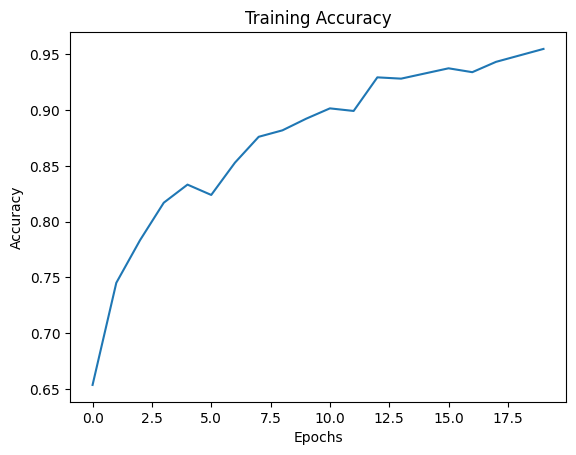

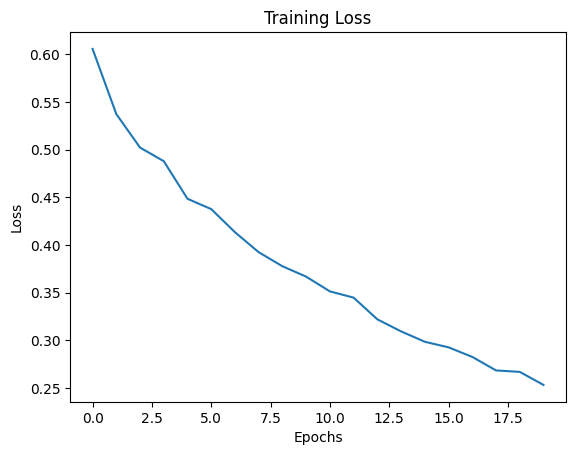

8/8 [==============================] - 13s 1s/step - loss: 1.1166 - accuracy: 0.4042


[1.1165587902069092, 0.40416666865348816]

In [19]:
# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot training loss
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()
in_pred.evaluate(test_data,test_labels)


In [20]:
test_ = in_pred.predict(test_text)
Y_pred= np.argmax(test_labels, axis=1)
true_label= np.argmax(test_, axis=1)

8/8 [==============================] - 12s 1s/step


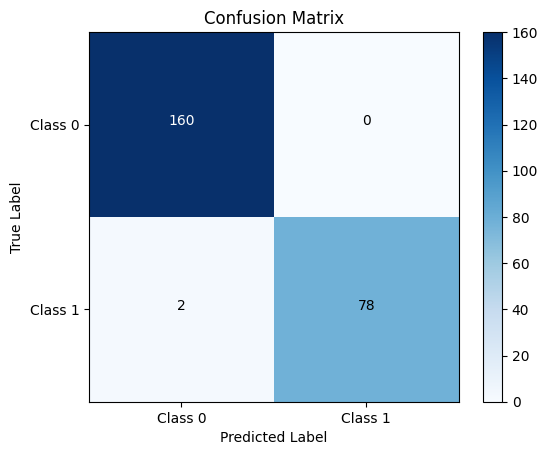

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       160
           1       1.00      0.97      0.99        80

    accuracy                           0.99       240
   macro avg       0.99      0.99      0.99       240
weighted avg       0.99      0.99      0.99       240

0.9916666666666667


In [21]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import numpy as np
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_pred,true_label)
# Define the class labels
class_labels = ['Class 0', 'Class 1']

confusion_matrix_values = np.array(cm)
# Plot the confusion matrix
plt.imshow(confusion_matrix_values, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.colorbar()

# Add labels to the plot
ticks = np.arange(len(class_labels))
plt.xticks(ticks, class_labels)
plt.yticks(ticks, class_labels)

# Add values inside the matrix
thresh = confusion_matrix_values.max() / 2.
for i in range(confusion_matrix_values.shape[0]):
    for j in range(confusion_matrix_values.shape[1]):
        plt.text(j, i, format(confusion_matrix_values[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_matrix_values[i, j] > thresh else "black")

# Display the plot
plt.show()
print(classification_report(Y_pred,true_label))
print(accuracy_score(Y_pred,true_label))